# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。



## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [4]:
# # Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# # 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

# import matplotlib
# matplotlib.rc("font",family='SimHei') # 中文字体

--2023-03-26 18:30:14--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  22.2MB/s    用时 0.4s    

2023-03-26 18:30:15 (22.2 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



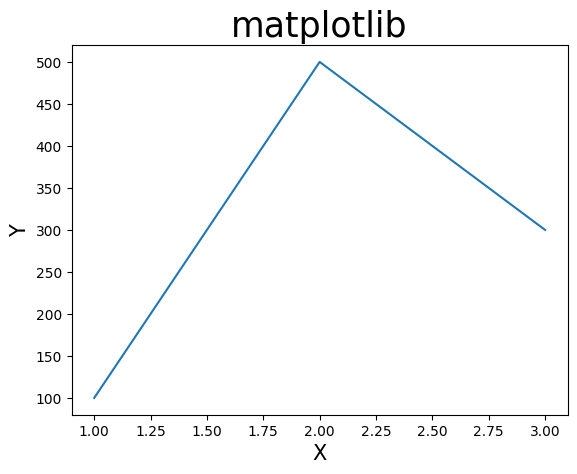

In [2]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib', fontsize=25)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

## 导入工具包

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [4]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['Angular', 'Rounded', 'Subangular', 'Subrounded', 'Very angular', 'Well rounded']


## 载入测试集预测结果表格

In [5]:
df = pd.read_csv('测试集预测结果.csv')

In [6]:
df.head()

,Image path,Labeling categories ID,Labeling categories name,top-1-Predictions ID,top-1-Predictions name,top-2-Predictions ID,top-2-Predictions name,top-3-Predictions ID,top-3-Predictions name,top-n Predictions correction,Angular-Predictions Confidence Level,Rounded-Predictions Confidence Level,Subangular-Predictions Confidence Level,Subrounded-Predictions Confidence Level,Very angular-Predictions Confidence Level,Well rounded-Predictions Confidence Level
0,Particle Figures_split/val/Angular/Angular (10...,0,Angular,0,Angular,4,Very angular,2,Subangular,True,0.574018,0.003499,0.111645,0.016418,0.294030,0.000390
1,Particle Figures_split/val/Angular/Angular (10...,0,Angular,3,Subrounded,2,Subangular,0,Angular,True,0.020437,0.010734,0.284462,0.672124,0.012037,0.000206
2,Particle Figures_split/val/Angular/Angular (11...,0,Angular,0,Angular,2,Subangular,4,Very angular,True,0.510571,0.087094,0.166346,0.104690,0.122172,0.009128
3,Particle Figures_split/val/Angular/Angular (13...,0,Angular,0,Angular,2,Subangular,4,Very angular,True,0.425345,0.004741,0.424306,0.027567,0.117619,0.000422
4,Particle Figures_split/val/Angular/Angular (13...,0,Angular,0,Angular,2,Subangular,4,Very angular,True,0.682034,0.010761,0.177304,0.050383,0.074711,0.004807


## 绘制某一类别的ROC曲线

In [7]:
specific_class = 'Subrounded'

In [8]:
# 二分类标注
y_test = (df['Labeling categories name'] == specific_class)

In [9]:
y_test

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Name: Labeling categories name, Length: 248, dtype: bool

In [10]:
# 二分类置信度
y_score = df['Subrounded-Predictions Confidence Level']

In [11]:
y_score

0      0.016418
1      0.672124
2      0.104690
3      0.027567
4      0.050383
         ...   
243    0.364321
244    0.279299
245    0.175994
246    0.235666
247    0.474003
Name: Subrounded-Predictions Confidence Level, Length: 248, dtype: float64

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

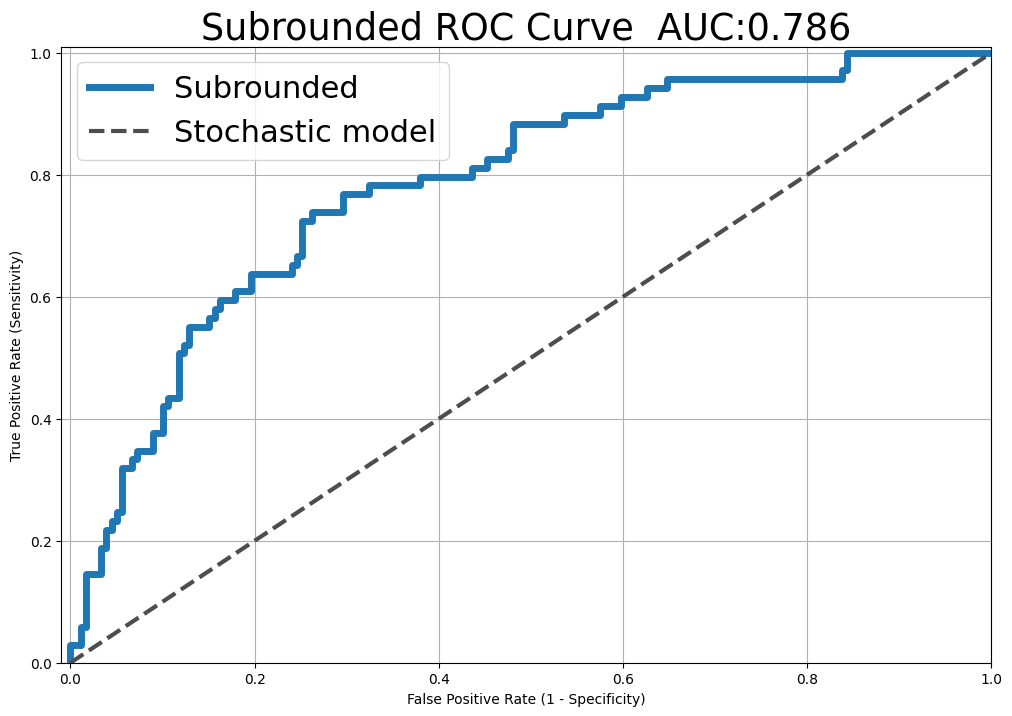

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='Stochastic model')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC Curve  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [14]:
auc(fpr, tpr)

0.7859282649178204

## 绘制所有类别的ROC曲线

In [15]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [16]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [17]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

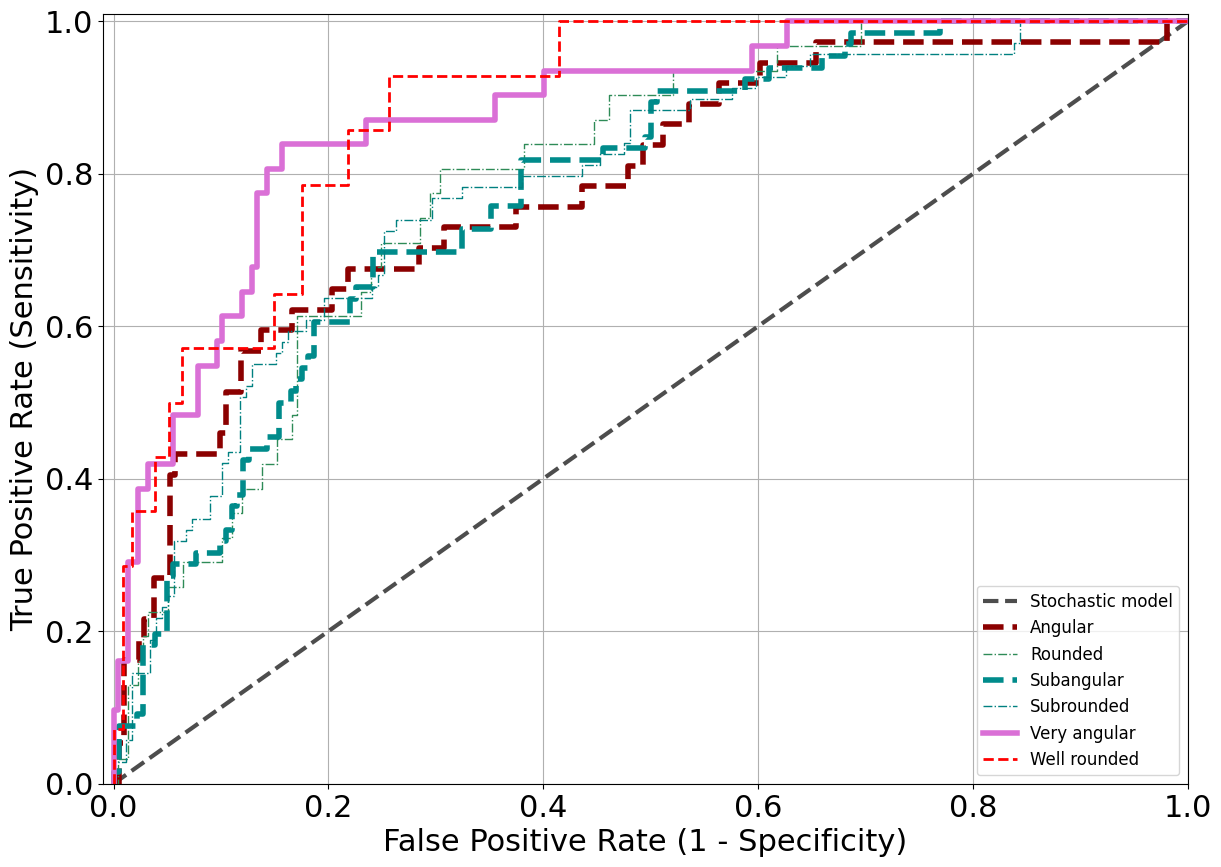

In [18]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='Stochastic model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['Labeling categories name'] == each_class))
    y_score = list(df['{}-Predictions Confidence Level'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig('各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [19]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [20]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP
0,Angular,0.439024,0.486486,0.461538,37.0,0.486486,0.432873
1,Rounded,0.454545,0.322581,0.377358,31.0,0.322581,0.336043
2,Subangular,0.546875,0.530303,0.538462,66.0,0.530303,0.535738
3,Subrounded,0.522727,0.666667,0.585987,69.0,0.666667,0.574630
4,Very angular,0.521739,0.387097,0.444444,31.0,0.387097,0.564448
5,Well rounded,0.500000,0.357143,0.416667,14.0,0.357143,0.396094
6,macro avg,0.497485,0.458379,0.470743,248.0,0.458379,0.473304
7,weighted avg,0.506737,0.508065,0.501442,248.0,0.508065,0.501956


In [21]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [22]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [23]:
df_report['AUC'] = auc_list

In [24]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,Angular,0.439024,0.486486,0.461538,37.0,0.486486,0.432873,0.784168
1,Rounded,0.454545,0.322581,0.377358,31.0,0.322581,0.336043,0.792181
2,Subangular,0.546875,0.530303,0.538462,66.0,0.530303,0.535738,0.776973
3,Subrounded,0.522727,0.666667,0.585987,69.0,0.666667,0.574630,0.785928
4,Very angular,0.521739,0.387097,0.444444,31.0,0.387097,0.564448,0.877657
5,Well rounded,0.500000,0.357143,0.416667,14.0,0.357143,0.396094,0.886752
6,macro avg,0.497485,0.458379,0.470743,248.0,0.458379,0.473304,0.817277
7,weighted avg,0.506737,0.508065,0.501442,248.0,0.508065,0.501956,0.801222


In [25]:
df_report.to_csv('各类别准确率评估指标.csv', index=False)